Prepare model by using logistic regression.

Also calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score, f1 score, roc auc score. Also Visualize the result. Also select best parameters using gridsearchCV. 


In [1]:
import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [5]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [6]:
df.cov()

,age,bought_insurance
age,247.923077,5.871795
bought_insurance,5.871795,0.259259


In [7]:
df.corr()

,age,bought_insurance
age,1.000000,0.732395
bought_insurance,0.732395,1.000000


<Axes: >

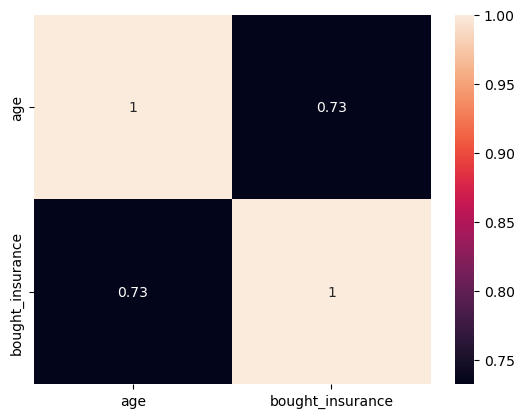

In [8]:
sns.heatmap(df.corr(), annot=True)

In [9]:
x = df.drop('bought_insurance', axis = 1)
y = df['bought_insurance']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123456)

In [11]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV()
model.fit(x_train, y_train)

LogisticRegressionCV()

In [12]:
from sklearn.model_selection import GridSearchCV
param = {'Cs': [0.001, 0.01, 0.1, 1, 10, 100, 1000],                 
    'cv': [3, 5, 10],             
    'penalty': ['l1', 'l2', 'elasticnet'],             
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga'],
    'class_weight': [None, 'balanced'],          
    'multi_class': ['ovr', 'multinomial'],       
    'fit_intercept': [True, False]}
gs = GridSearchCV(model, param)
gs.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegressionCV(),
             param_grid={'Cs': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [None, 'balanced'], 'cv': [3, 5, 10],
                         'fit_intercept': [True, False],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga']})

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"acc: {acc:.2f}, pre: {pre:.2f}, recall: {recall:.2f}, f1: {f1:.2f}")

acc: 0.83, pre: 0.75, recall: 1.00, f1: 0.86
